In [81]:
import joblib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge, ElasticNet, RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, GridSearchCV, RandomizedSearchCV

 from mlxtend.evaluate import bias_variance_decomp

Function

In [82]:
def polynomial(x):
    phi_x = np.array([x** i for i in range(d+1)])
    phi_x = phi_x[... , 0].T
    return phi_x


In [83]:
def linear_regression(x, w):
    y_hat = x @ w
    return y_hat

In [84]:
def mse(y , y_hat):
    loss = np.mean((y - y_hat)**2)
    return loss
    
    

In [85]:
def gradient(x, y, y_hat):
    grads = 2*(x.T @ (y_hat - y)) / y.shape[0]
    return grads

In [86]:
def gradient_descent(w , eta, grads):
    w -= eta * grads
    return w

In [87]:
def mae (y , y_hat):
    loss = np.mean(np.abs(y - y_hat))
    return loss

In [88]:
def r2(y, y_hat):
    return 1 - np.sum((y - y_hat)**2) / np.sum((y - y.mean())**2)

Load Dataset

In [89]:
df = pd.read_csv("G:/Howsam/week 5/data/energy-train-s.csv")
train_set = np.array(df)

x_train = train_set[:, :-1]
y_train = train_set[:, -1:]

df = pd.read_csv('G:/Howsam/week 5/data/energy-test-s.csv')
test_set = np.array(df)

x_test = test_set[:, :-1]
y_test = test_set[:, -1:]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((29, 1), (29, 1), (50, 1), (50, 1))

In [90]:
d = 2
phi_x_train = polynomial(x_train)
phi_x_test = polynomial(x_test)

phi_x_train.shape, phi_x_test.shape

((29, 3), (50, 3))

Initialization


In [91]:
w = np.random.randn(d+1, 1)
print(w)

eta = 0.01
n_epochs = 2000

[[ 0.27671225]
 [-1.46250183]
 [-0.12115486]]


Train

In [92]:
error_hist_train = []
error_hist_test = []
score_test_hist= [] 
score_train_hist=[]

for epochs in range(n_epochs):
    #prediction
    
    y_hat = linear_regression(phi_x_train , w)
    
    #loss
    
    e = mse(y_train , y_hat)
    error_hist_train.append(e)
    
    #gradients
    grads = gradient(phi_x_train , y_train , y_hat)
    
    #gradient_descent
    w = gradient_descent(w , eta , grads)
    
    #evaluation
    y_hat_test = linear_regression(phi_x_test , w)
    e_test = mse(y_test , y_hat_test)
    error_hist_test.append(e_test)
     
    # metric test
    s_test= r2(y_test , y_hat_test)
    score_test_hist.append(s_test)
    
     #metric test
    s = r2(y_train , y_hat)
    score_train_hist.append(s)
    
    
    if (epochs+1) % 100 == 0:
        print(f'Epoch={epochs} , \t E_train={e : .4} ,\t w={w.T[0]} , e_test={e_test: .4}, \t r2_train= {s:.4} , r2_test={s_test: .4}')
    


Epoch=99 , 	 E_train= 0.3873 ,	 w=[-0.24685638  0.17440754  0.4599405 ] , e_test= 0.2836, 	 r2_train= 0.6127 , r2_test= 0.5373
Epoch=199 , 	 E_train= 0.1848 ,	 w=[-0.54727705  0.40300519  0.64625623] , e_test= 0.2169, 	 r2_train= 0.8152 , r2_test= 0.6461
Epoch=299 , 	 E_train= 0.156 ,	 w=[-0.68427106  0.43816343  0.72876662] , e_test= 0.2422, 	 r2_train= 0.844 , r2_test= 0.6048
Epoch=399 , 	 E_train= 0.1505 ,	 w=[-0.7455925   0.4449767   0.76543395] , e_test= 0.2605, 	 r2_train= 0.8495 , r2_test= 0.575
Epoch=499 , 	 E_train= 0.1494 ,	 w=[-0.77290264  0.44683602  0.7817293 ] , e_test= 0.27, 	 r2_train= 0.8506 , r2_test= 0.5595
Epoch=599 , 	 E_train= 0.1492 ,	 w=[-0.78504728  0.44750735  0.78897112] , e_test= 0.2744, 	 r2_train= 0.8508 , r2_test= 0.5522
Epoch=699 , 	 E_train= 0.1491 ,	 w=[-0.79044552  0.44778514  0.79218947] , e_test= 0.2765, 	 r2_train= 0.8509 , r2_test= 0.5489
Epoch=799 , 	 E_train= 0.1491 ,	 w=[-0.79284468  0.44790587  0.79361974] , e_test= 0.2774, 	 r2_train= 0.8509 

Learning Curve


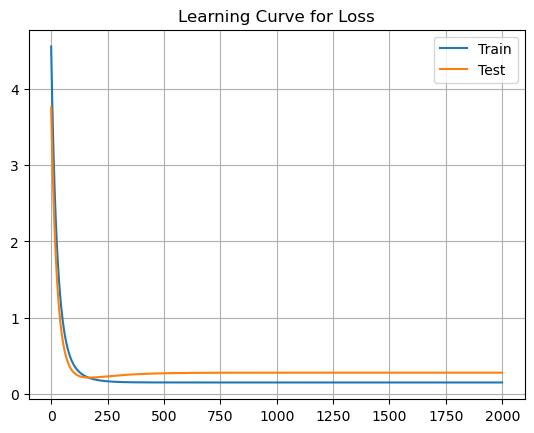

In [93]:
plt.plot(error_hist_train, label='Train')
plt.plot(error_hist_test, label='Test');
plt.legend()
plt.grid()
plt.title('Learning Curve for Loss');

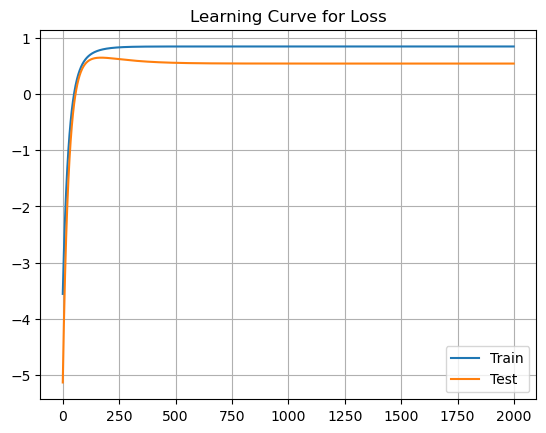

In [94]:
plt.plot(score_train_hist, label='Train')
plt.plot(score_test_hist, label='Test');
plt.legend()
plt.grid()
plt.title('Learning Curve for Loss');